# EXPERIMENT 7

###### Step 1:  Problem Statement
To perform prediction using Logistic Regression on the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Step 2: Data Collection

In [2]:
df = pd.read_csv(r'./datasets/ChurnData.csv')

In [3]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]

In [5]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


###### Step 3: Exploratory Data Analysis

In [6]:
df.shape

(200, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


In [8]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
churn       float64
dtype: object

<AxesSubplot:>

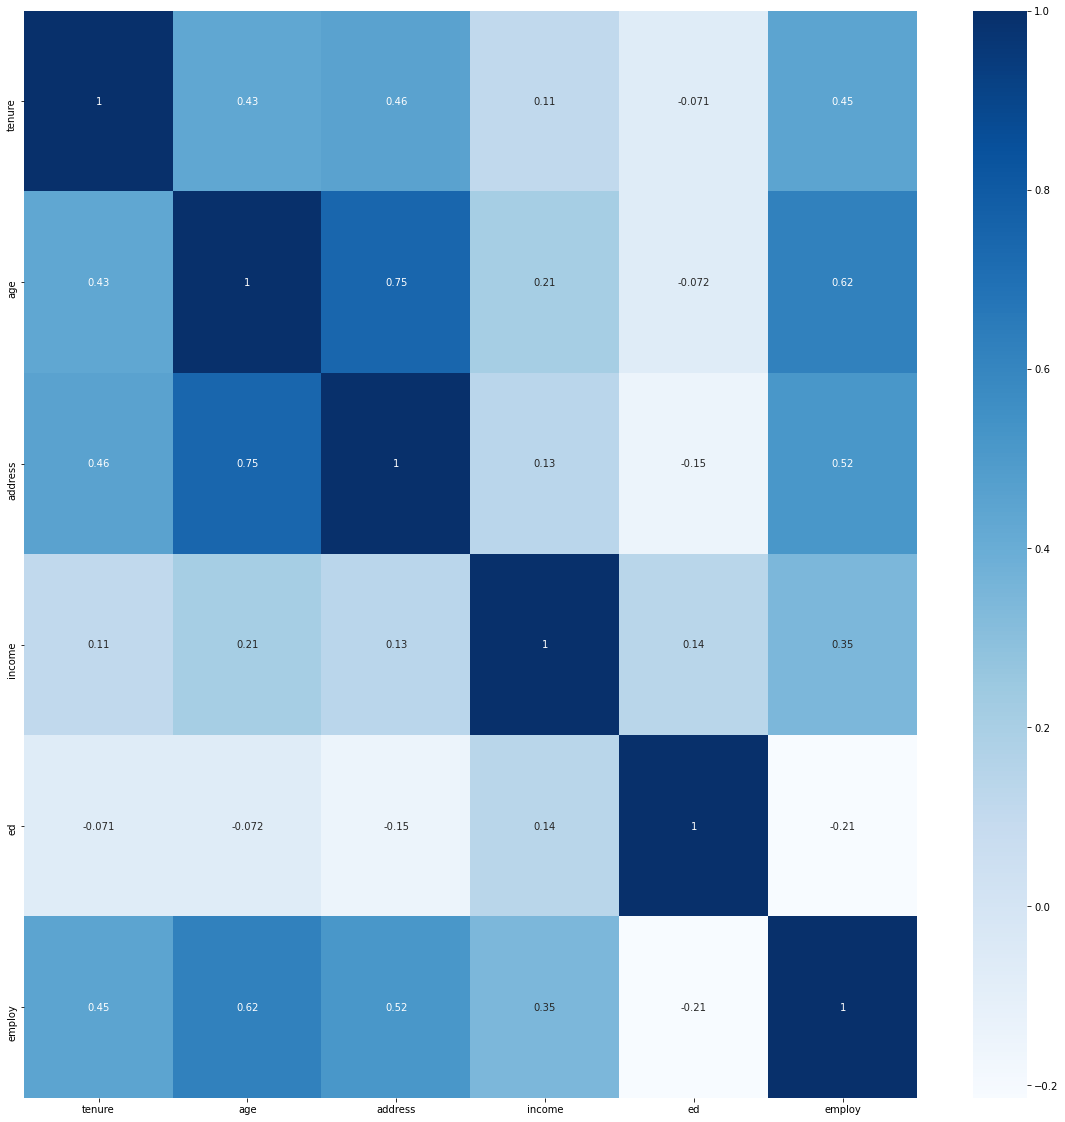

In [10]:
# Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df[["tenure", "age", "address", "income", "ed", "employ"]].corr(), annot=True, cmap="Blues")

In [11]:
# Checking for NaN values in the dataset
df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
churn       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x185d1432220>,
 'caps': [<matplotlib.lines.Line2D at 0x185d14328e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x185d1421e80>,
 'medians': [<matplotlib.lines.Line2D at 0x185d1432fa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x185d143b340>,
 'means': []}

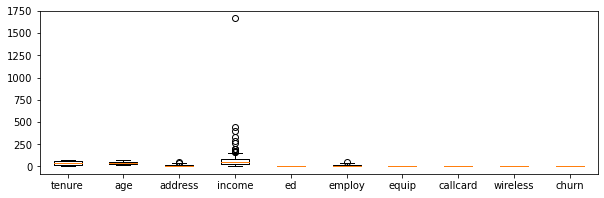

In [13]:
# Visualizing the outliers
fig=plt.figure(figsize=(10,3))
plt.boxplot(df, labels=df.columns)

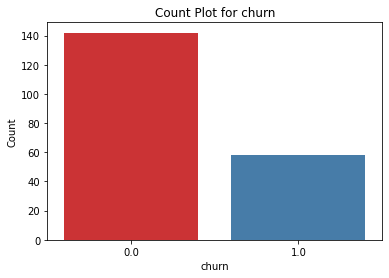

In [14]:
countplot = sns.countplot(x=df['churn'], data=df, palette='Set1')
plt.xlabel('churn')
plt.ylabel('Count')
plt.title('Count Plot for churn')
plt.show()

Dataset is not imbalanced

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


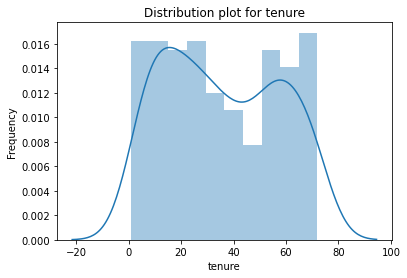

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


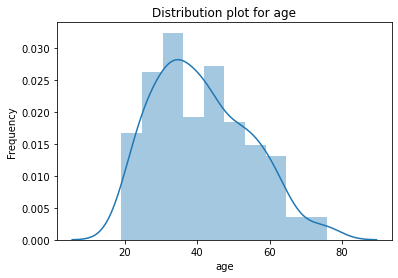

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


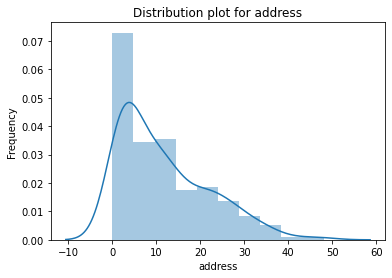

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


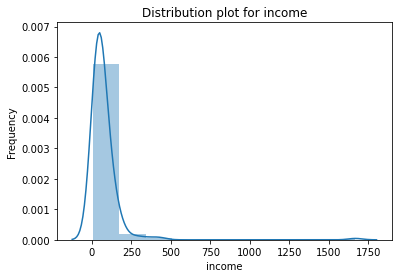

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


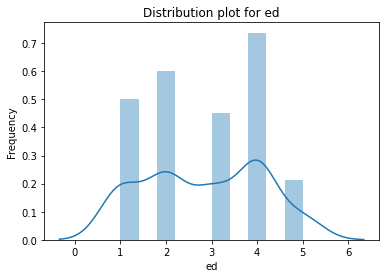

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


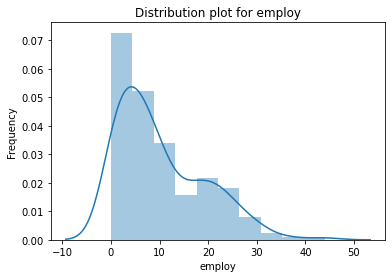

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


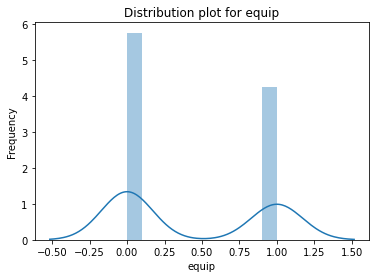

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


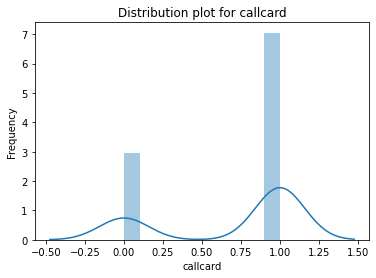

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


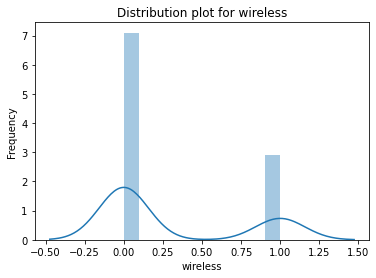

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


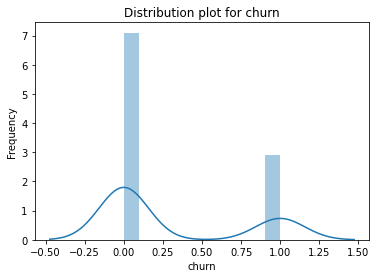

In [15]:
# Visualization of the features of the dataset using Distribution Plots
for cols in df.columns:
    distributionplot = sns.distplot(a=df[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

###### Step 4: Data Preprocessing

Data Preprocessing on Train Data

In [16]:
# Input DataFrame
X=df.iloc[:,0:-1]
X.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0


In [17]:
# Target DataFrame
Y=df.iloc[:,-1]
Y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


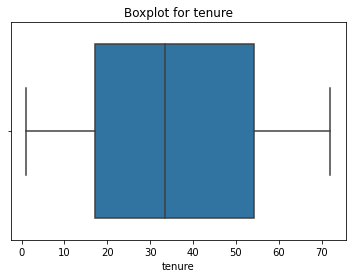

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


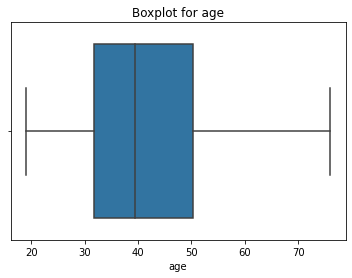

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


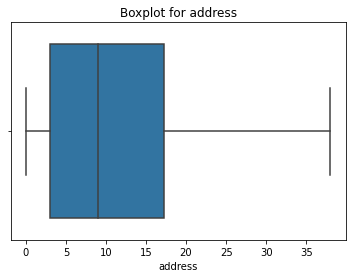

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


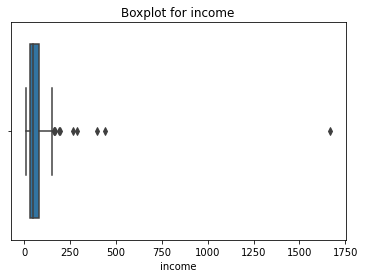

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


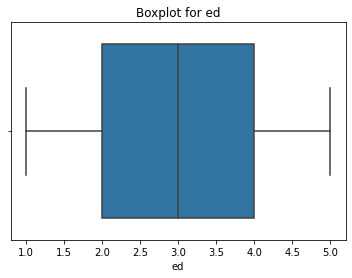

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


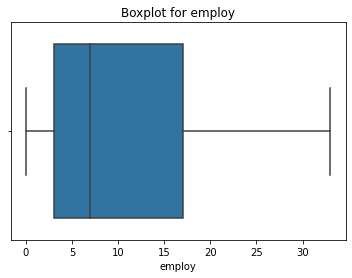

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


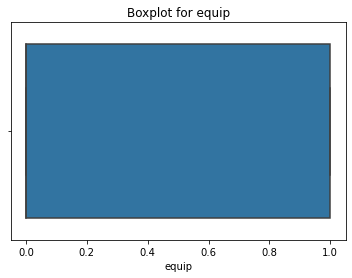

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


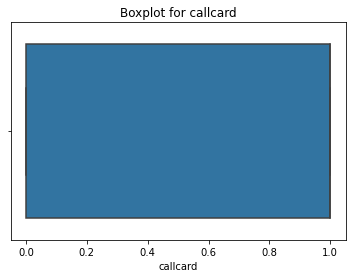

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


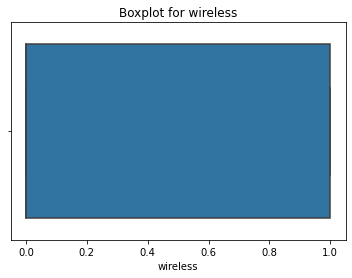

In [19]:
for cols in X_train.columns:
    bp = sns.boxplot(X_train[cols])
    plt.xlabel(cols)
    plt.title('Boxplot for ' + cols)
    plt.show()

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

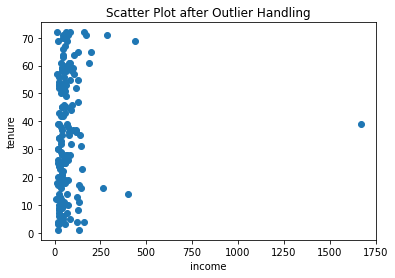

In [20]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(X_train['income'],X_train['tenure'])
plt.xlabel('income')
plt.ylabel('tenure')
plt.title('Scatter Plot after Outlier Handling')

In [21]:
# Handling the outliers using quantile-based Capping and Flooring techniqueupper_limit = X_train['bmi'].quantile(0.99)
upper_limit = X_train['income'].quantile(0.99)
lower_limit = X_train['income'].quantile(0.01)
X_train['income'] = np.where(X_train['income'] >= upper_limit, upper_limit,
        np.where(X_train['income'] <= lower_limit, lower_limit, X_train['income']))

Text(0.5, 1.0, 'Scatter Plot after Outlier Handling')

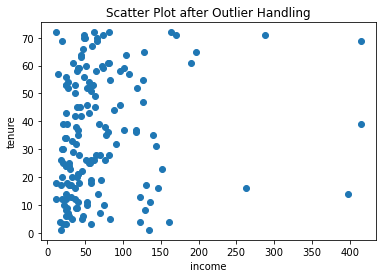

In [22]:
#Visualization using Scatter Plot after Outlier Handling
plt.scatter(X_train['income'],X_train['tenure'])
plt.xlabel('income')
plt.ylabel('tenure')
plt.title('Scatter Plot after Outlier Handling')

Data Preprocessing on Testing Data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


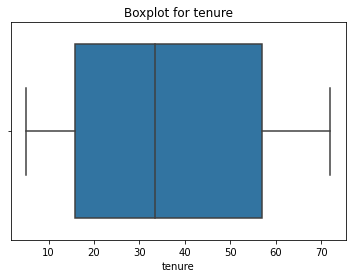

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


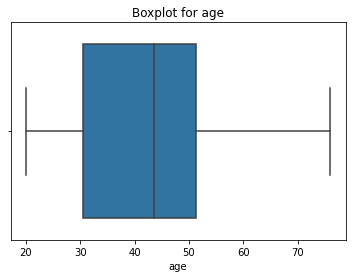

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


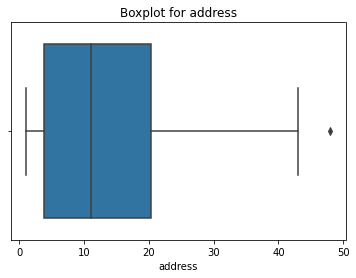

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


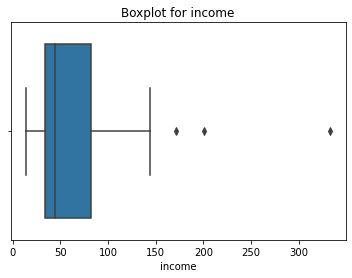

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


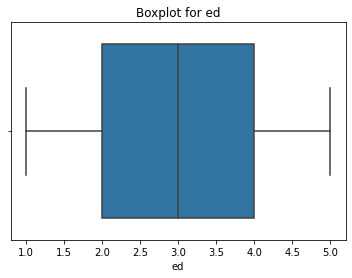

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


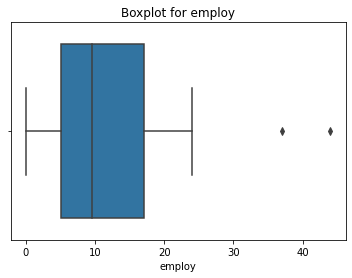

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


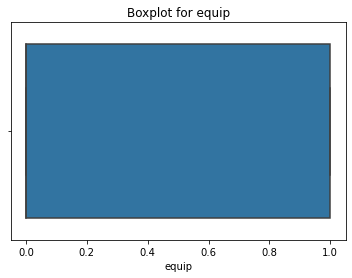

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


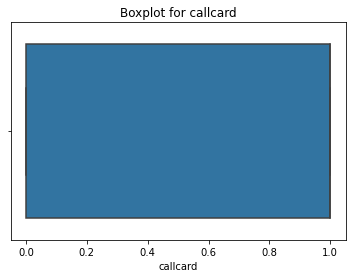

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


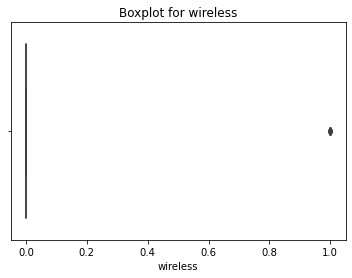

In [23]:
for cols in X_test.columns:
    bp = sns.boxplot(X_test[cols])
    plt.xlabel(cols)
    plt.title('Boxplot for ' + cols)
    plt.show()

In [24]:
# Handling the outliers using quantile-based Capping and Flooring techniqueupper_limit = X_train['bmi'].quantile(0.99)
upper_limit = X_train['income'].quantile(0.99)
lower_limit = X_train['income'].quantile(0.01)
X_train['income'] = np.where(X_train['income'] >= upper_limit, upper_limit,
        np.where(X_train['income'] <= lower_limit, lower_limit, X_train['income']))

In [25]:
# Handling the outliers using quantile-based Capping and Flooring techniqueupper_limit = X_train['bmi'].quantile(0.99)
upper_limit = X_train['employ'].quantile(0.99)
lower_limit = X_train['employ'].quantile(0.01)
X_train['employ'] = np.where(X_train['employ'] >= upper_limit, upper_limit,
        np.where(X_train['employ'] <= lower_limit, lower_limit, X_train['employ']))

##### Feature Scaling (standardizing the features)

In [26]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.34853581, -1.25143165, -0.74850189,  0.11192614,  0.12608293,
        -0.90652149,  1.13389342,  0.6352234 , -0.67419986],
       [-0.89658776,  0.66387227,  0.60413402, -0.42613956, -0.64981202,
        -0.55808832,  1.13389342, -1.5742493 ,  1.4832397 ],
       [-1.31754842, -1.09182299, -0.8525508 , -0.45688617,  0.12608293,
        -0.90652149, -0.8819171 , -1.5742493 , -0.67419986],
       [ 1.25498899,  2.81858919,  0.91628076, -0.51837939,  0.12608293,
         0.95178876, -0.8819171 ,  0.6352234 , -0.67419986],
       [ 0.36629425, -0.93221433, -0.74850189, -0.549126  , -1.42570698,
         0.37106681, -0.8819171 ,  0.6352234 ,  1.4832397 ],
       [-0.14821324,  0.26485062, -0.12420839,  2.03358934, -0.64981202,
         1.64865511, -0.8819171 ,  0.6352234 , -0.67419986],
       [ 1.53562944,  0.90328526,  0.60413402,  0.78835159, -1.42570698,
         1.64865511, -0.8819171 ,  0.6352234 , -0.67419986],
       [-1.36432183, -0.93221433, -0.74850189, -0.76435228, -0

###### Step 5: Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,Y_train)

Y_pred_train_logistic=model_logistic.predict(X_train)
Y_pred_test_logistic=model_logistic.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### Step 6: Model Evaluation

Test accuracy: 0.8

Classification Report:

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87        31
         1.0       0.55      0.67      0.60         9

    accuracy                           0.80        40
   macro avg       0.72      0.75      0.73        40
weighted avg       0.82      0.80      0.81        40


Confusion Matrix:



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


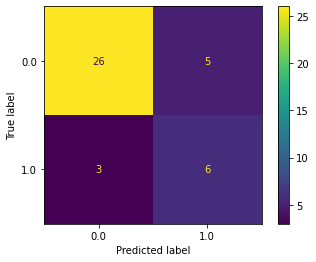

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score, roc_curve, RocCurveDisplay, plot_confusion_matrix
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_logistic)))

print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_logistic))

print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_logistic,X_test, Y_test) 

###### Test accuracy: 0.8
######  Recall Score: 0.84
###### Precision: 0.90
######  F1-Score: 0.87